In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
tv = pd.read_csv('tv.csv')
halftime = pd.read_csv('halftime_musicians.csv')
super_bowls = pd.read_csv('super_bowls.csv')

display(tv.head())
display(halftime.head())
display(super_bowls.head())

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [6]:
tv.info()
print('\n')
halftime.info()
print('\n')
super_bowls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

In [9]:
super_bowls.loc[0:20,['combined_pts']]

,combined_pts
0,74
1,62
2,34
3,52
4,51
5,65
6,38
7,56
8,48
9,50


In [10]:
super_bowls['combined_pts'].describe()

count    52.000000
mean     46.807692
std      13.535775
min      21.000000
25%      37.000000
50%      46.500000
75%      56.000000
max      75.000000
Name: combined_pts, dtype: float64

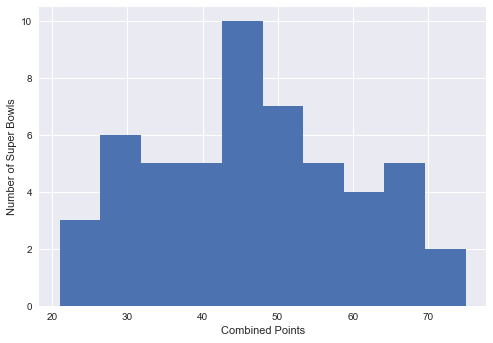

In [19]:
plt.hist(super_bowls['combined_pts'], bins=10)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

In [17]:
# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [24]:
super_bowls.loc[:,['super_bowl']][super_bowls['combined_pts'] < 25]

,super_bowl
43,9
45,7
49,3


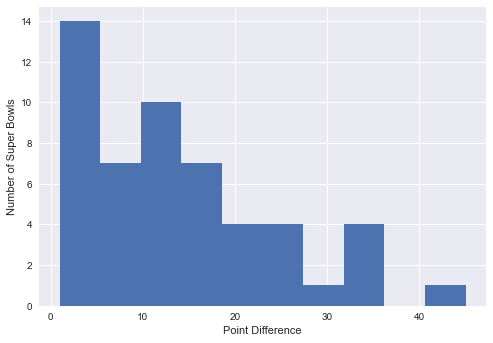

In [25]:
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

In [30]:
display(super_bowls.loc[:][super_bowls['difference_pts'] ==1])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


In [34]:
super_bowls.columns

Index(['date', 'super_bowl', 'venue', 'city', 'state', 'attendance',
       'team_winner', 'winning_pts', 'qb_winner_1', 'qb_winner_2',
       'coach_winner', 'team_loser', 'losing_pts', 'qb_loser_1', 'qb_loser_2',
       'coach_loser', 'combined_pts', 'difference_pts'],
      dtype='object')

In [39]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

print(tv.columns)
print(games_tv.columns)

Index(['super_bowl', 'network', 'avg_us_viewers', 'total_us_viewers',
       'rating_household', 'share_household', 'rating_18_49', 'share_18_49',
       'ad_cost'],
      dtype='object')
Index(['super_bowl', 'network', 'avg_us_viewers', 'total_us_viewers',
       'rating_household', 'share_household', 'rating_18_49', 'share_18_49',
       'ad_cost', 'date', 'venue', 'city', 'state', 'attendance',
       'team_winner', 'winning_pts', 'qb_winner_1', 'qb_winner_2',
       'coach_winner', 'team_loser', 'losing_pts', 'qb_loser_1', 'qb_loser_2',
       'coach_loser', 'combined_pts', 'difference_pts'],
      dtype='object')


In [38]:
print(len(games_tv.columns))
print(len(tv.columns))
print(len(super_bowls.columns))

26
9
18


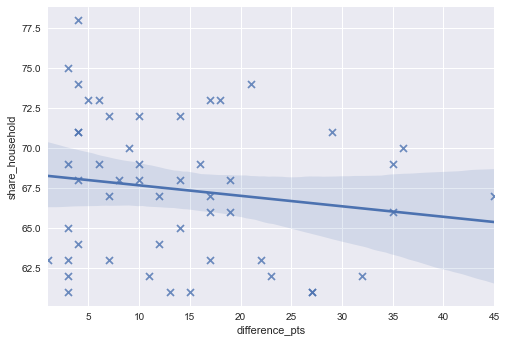

In [46]:
sns.regplot(x='difference_pts', y='share_household', data=games_tv, marker='x')

In [47]:
display(tv.columns)

Index(['super_bowl', 'network', 'avg_us_viewers', 'total_us_viewers',
       'rating_household', 'share_household', 'rating_18_49', 'share_18_49',
       'ad_cost'],
      dtype='object')

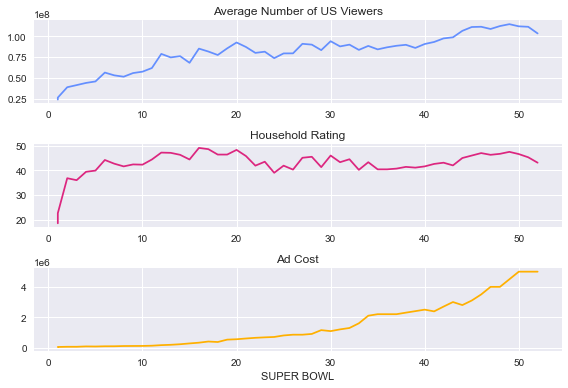

In [48]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers , color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household , color='#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000' )
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

In [52]:
tv.loc[:][tv['ad_cost'] == tv['ad_cost'].max()]

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000


In [53]:
tv.loc[:][tv['ad_cost'] == tv['ad_cost'].min()]

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
52,1,NBC,24430000,NaN,18.5,36,NaN,NaN,37500


In [54]:
halftime.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [55]:
halftime.loc[:][halftime['super_bowl'] <=27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


In [65]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime.groupby('musician').count()['super_bowl'].reset_index()

In [66]:
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

In [67]:
halftime_appearances

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
...,...,...
37,Katy Perry,1
35,Judy Mallett,1
34,Jessica Simpson,1
33,Janet Jackson,1


In [69]:
halftime_appearances.loc[:][halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


In [70]:
len(halftime_appearances.loc[:][halftime_appearances['super_bowl'] > 1])

14

In [71]:
# Filter out most marching bands
no_bands = halftime[~halftime.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
#plt.hist(no_bands.num_songs.dropna(), ...=...)
# ... YOUR CODE FOR TASK 9 ...
#plt.ylabel('Number of Musicians')
#plt.show()

# Sort the non-band musicians by number of songs per appearance...
#no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
#display(no_bands.head(15))

In [73]:
halftime

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
129,3,Florida A&M University Marching 100 Band,NaN
130,2,Grambling State University Tiger Marching Band,NaN
131,1,University of Arizona Symphonic Marching Band,NaN
132,1,Grambling State University Tiger Marching Band,NaN


In [77]:
no_bands['musician'].unique()

array(['Justin Timberlake', 'Lady Gaga', 'Coldplay', 'Beyoncé',
       'Bruno Mars', 'Mark Ronson', 'Youth Orchestra Los Angeles',
       'Gustavo Dudamel', 'Katy Perry', 'Lenny Kravitz', 'Missy Elliott',
       'Red Hot Chili Peppers', "Destiny's Child", 'Kelly Rowland',
       'Michelle Williams', 'Madonna', 'LMFAO', 'Nicki Minaj', 'M.I.A.',
       'Cee Lo Green', 'The Black Eyed Peas', 'Slash', 'Usher',
       'will.i.am', 'Fergie', 'The Who',
       'Bruce Springsteen and the E Street Band',
       'Tom Petty & the Heartbreakers', 'Prince', 'The Rolling Stones',
       'Paul McCartney', 'Jessica Simpson', 'Janet Jackson', 'P. Diddy',
       'Nelly', 'Kid Rock', 'Shania Twain', 'No Doubt', 'Sting', 'U2',
       'Aerosmith', 'NSYNC', 'Britney Spears', 'Mary J. Blige',
       'Phil Collins', 'Christina Aguilera', 'Enrique Iglesias',
       'Toni Braxton', 'Gloria Estefan', 'Stevie Wonder',
       'Big Bad Voodoo Daddy', 'Boyz II Men', 'Smokey Robinson',
       'Martha Reeves', 'The Te

In [81]:
no_bands['num_songs'].max()

11.0

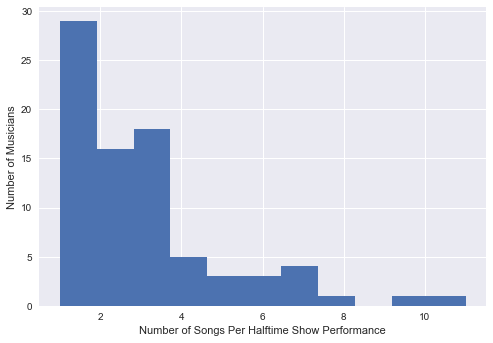

In [82]:
# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

In [83]:
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [84]:
no_bands.describe()

,super_bowl,num_songs
count,109.000000,81.000000
mean,30.788991,2.777778
std,14.247205,2.162175
min,1.000000,1.000000
25%,23.000000,1.000000
50%,33.000000,2.000000
75%,44.000000,3.000000
max,52.000000,11.000000


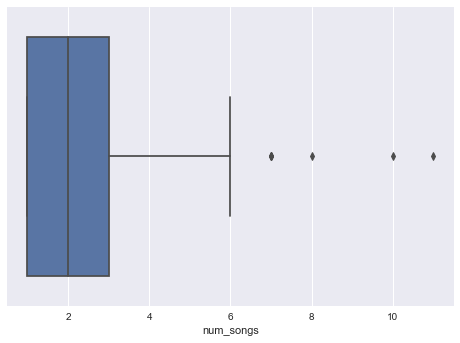

In [85]:
sns.boxplot(x='num_songs', data=no_bands )

In [88]:
tv.set_index('super_bowl', inplace=True)

In [89]:
tv.index

Int64Index([52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36,
            35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19,
            18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
             1,  1],
           dtype='int64', name='super_bowl')

In [98]:
tv.values[0:10]

array([['NBC', 103390000, nan, 43.1, 68, 33.4, 78.0, 5000000],
       ['Fox', 111319000, 172000000.0, 45.3, 73, 37.1, 79.0, 5000000],
       ['CBS', 111864000, 167000000.0, 46.6, 72, 37.7, 79.0, 5000000],
       ['NBC', 114442000, 168000000.0, 47.5, 71, 39.1, 79.0, 4500000],
       ['Fox', 112191000, 167000000.0, 46.7, 69, 39.3, 77.0, 4000000],
       ['CBS', 108693000, 164100000.0, 46.3, 69, 39.7, 77.0, 4000000],
       ['NBC', 111346000, 163500000.0, 47.0, 71, 40.5, nan, 3500000],
       ['Fox', 111041000, 162900000.0, 46.0, 69, 39.9, nan, 3100000],
       ['CBS', 106476000, 153400000.0, 45.0, 68, 38.6, nan, 2800000],
       ['NBC', 98732000, 151600000.0, 42.0, 64, 36.7, nan, 3000000]],
      dtype=object)

In [101]:
tv.head()

,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
super_bowl,,,,,,,,
52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [105]:
tv.sort_values(['avg_us_viewers','total_us_viewers'], ascending=[False,True])

,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
super_bowl,,,,,,,,
49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000
50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
46,NBC,111346000,163500000.0,47.0,71,40.5,NaN,3500000
51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
45,Fox,111041000,162900000.0,46.0,69,39.9,NaN,3100000
47,CBS,108693000,164100000.0,46.3,69,39.7,77.0,4000000
44,CBS,106476000,153400000.0,45.0,68,38.6,NaN,2800000
52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000


In [108]:
tv['network'].value_counts()

CBS    19
NBC    19
Fox     8
ABC     7
Name: network, dtype: int64

In [109]:
halftime

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
129,3,Florida A&M University Marching 100 Band,NaN
130,2,Grambling State University Tiger Marching Band,NaN
131,1,University of Arizona Symphonic Marching Band,NaN
132,1,Grambling State University Tiger Marching Band,NaN


In [111]:
df= pd.read_csv('Enter_korea_by_purpose-Copy1.csv')
df.head()

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,2506,2,0,17,45


In [117]:
df.loc[:,['nation']][df['visitor'] >50000]

,nation
0,China
1,Japan
2,Taiwan
25,USA
60,China
...,...
723,Hong Kong
745,USA
780,China
781,Japan


In [119]:
df[df['nation'].isin(['China','Japan','USA'])]

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
25,2019-1,USA,62737,4.744970,5.678569,42989,418,2578,229,16523
60,2019-2,China,453379,31.284441,37.724933,324291,2694,143,38731,87520
61,2019-2,Japan,213200,26.722975,17.740027,204697,2125,119,2084,4175
85,2019-2,USA,57732,-12.592166,4.803786,38475,386,1970,1144,15757
120,2019-3,China,487623,20.874389,31.753711,369165,3933,414,32532,81579
121,2019-3,Japan,375119,27.385254,24.427519,367157,2108,126,1231,4497
145,2019-3,USA,84275,5.239826,5.487936,65448,400,2221,190,16016
180,2019-4,China,493250,34.545722,30.166978,410542,3575,362,9959,68812


In [120]:
df = df.head(20)

In [124]:
df.drop(['date','share'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [125]:
df

,nation,visitor,growth,tourism,business,official affairs,studying,others
0,China,392814,28.737870,320113,2993,138,8793,60777
1,Japan,206526,23.606830,198805,2233,127,785,4576
2,Taiwan,87954,16.003693,86393,74,22,180,1285
3,Hong Kong,35896,3.533212,34653,59,2,90,1092
4,Macao,2570,-12.376406,2506,2,0,17,45
5,Phillipines,30473,0.062389,14279,211,161,184,15638
6,Indonesia,18842,10.614066,14183,136,38,187,4298
7,Thailand,41334,-8.026079,34004,37,199,96,6998
8,Vietnam,20183,23.936138,10739,763,110,1667,6904
9,India,8671,16.844091,2318,2656,46,177,3474


In [127]:
df.set_index('nation', inplace=True)

In [130]:
df['total'] = df['visitor'] + df['tourism'] + df['business'] + df['official affairs'] + df['studying'] + df['others']

<ipython-input-130-94ce81e8fb0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = df['visitor'] + df['tourism'] + df['business'] + df['official affairs'] + df['studying'] + df['others']


In [137]:
df.sort_values('total', ascending=False)

,visitor,growth,tourism,business,official affairs,studying,others,total
nation,,,,,,,,
China,392814,28.737870,320113,2993,138,8793,60777,785628
Japan,206526,23.606830,198805,2233,127,785,4576,413052
Taiwan,87954,16.003693,86393,74,22,180,1285,175908
Thailand,41334,-8.026079,34004,37,199,96,6998,82668
Hong Kong,35896,3.533212,34653,59,2,90,1092,71792
Phillipines,30473,0.062389,14279,211,161,184,15638,60946
Malaysia,22065,-0.217067,19043,95,7,99,2821,44130
Vietnam,20183,23.936138,10739,763,110,1667,6904,40366
Indonesia,18842,10.614066,14183,136,38,187,4298,37684


In [145]:
class Dog:
    def __init__(self):
        pass
    
    def bark(self):
        return "bark bark bark bark bark bark..."

d = Dog()

In [150]:
Dog()

In [155]:
def add(a, b):
    return a + b

x= add(1, 2)

x

3

In [156]:
def num_sq(x):
    print(x ** 2)

num_sq(3)

9


In [157]:
8*60*60

28800

In [160]:
i=0 
for i in range(5):
    print(i)

0
1
2
3
4


In [161]:
def time_to_seconds(hours, minutes):
    print(hours * 60 * 60 + minutes * 60)

time_to_seconds(1,50)

6600


In [162]:
Class Planet(name):
    def __init__(self, name):
        self.name = name
        
m = Planet('mercury')

m.name

SyntaxError: invalid syntax (<ipython-input-162-867b7026e097>, line 1)

In [164]:
s = "animal-horse"

s.("-")

SyntaxError: invalid syntax (<ipython-input-164-90e47a7772c6>, line 3)

In [165]:
d = {
    'apple': 1,
    'banana': 2,
    'coconut': 3
}

d['durian']=4


d

{'apple': 1, 'banana': 2, 'coconut': 3, 'durian': 4}

In [168]:
d = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4
}

d['two']


2

In [169]:
book = {
    'title': 'The Giver',
    'author': 'Lois Lowry',
    'rating': 4.13
}

book['rating']=4.6


In [170]:
book['rating']

4.6

In [171]:
ints = set([1,1,2,3,3,3,4])
print(len(ints))

4


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

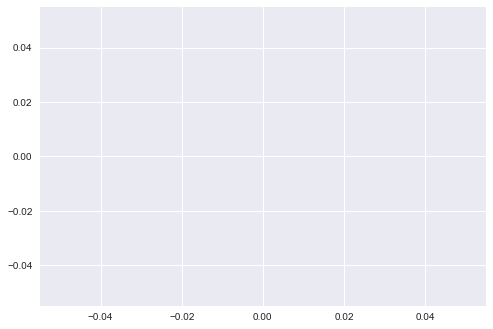

In [172]:
plt.axis('tight')